In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importar el dataset
dsalary = pd.read_csv('C:/Users/AlexP/Documents/workspace/data-analysis/Laboratorios 9C/SalaryData.csv')

In [3]:
# Visualizar el dataset
dsalary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Extracción de datos en las columnas x, y

x = dsalary .iloc[:,:-1].values
y = dsalary .iloc[:,1].values

In [5]:
# Años de experiencia
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
# Salario
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
# Importar libreria de división de datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

In [8]:
# Dividir los datos de entrenamiento y prueba, 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [9]:
# Importar libreria de regresion lieal de Scimkit learn
from sklearn.linear_model import LinearRegression

In [10]:
# Construir el modelo de regresion lineal
reg = LinearRegression()

In [11]:
# Entrenamiento del modelo creado con los datos de entrenamiento
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
LinearRegression()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Utilizar los datos de prueba para validar que el algoritmo es optimo
y_pred = reg.predict(x_test)
x_pred =reg.predict(x_train)

Training Set


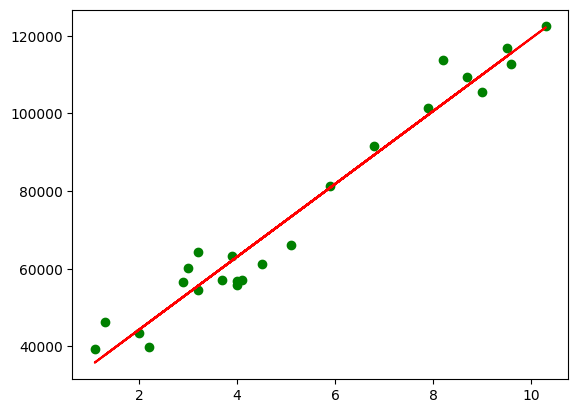

In [14]:
print("Training Set")
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train,x_pred,color="red")
plt.show()

In [15]:
# Importar la libreria de metricas del modelo de prediccion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Metricas de evaluacion
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print("Metricas de evaluacion del modelo")
print("MAE (Error Absoluto Medio):", mae)
print("MSE (Error Cuadratico Medio)", mse)
print("RMSE (Error de Raiz Cuadrada Media)", rmse)
print("R2 Score", r2)

Metricas de evaluacion del modelo
MAE (Error Absoluto Medio): 5615.335337645195
MSE (Error Cuadratico Medio) 44415286.66777224
RMSE (Error de Raiz Cuadrada Media) 6664.479474630576
R2 Score 0.9355713015585576


In [18]:
print("Metricas de evaluacion del modelo")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadratico Medio), {mse:.2f}")
print(f"RMSE (Error de Raiz Cuadrada Media), {rmse:.2f}")
print(f"R2 Score, {r2:.4f}")

Metricas de evaluacion del modelo
MAE (Error Absoluto Medio): 5615.34
MSE (Error Cuadratico Medio), 44415286.67
RMSE (Error de Raiz Cuadrada Media), 6664.48
R2 Score, 0.9356


In [19]:
#Signfica que el 95% de la variabilidad en los datos reales es explicada por el modelo.

In [22]:
# Pryueba del modelo
print("Prueba del modelo entrenado")

# Valores de ejmplo para probar
valores_ejemplo = [1,3,5,8,12]

for valor in valores_ejemplo:
    prediccion = reg.predict([[valor]])[0]
    print(f"Si X = {valor:2d} Salario predicho: ${prediccion:,.2f}")

Prueba del modelo entrenado
Si X =  1 Salario predicho: $34,935.18
Si X =  3 Salario predicho: $53,692.50
Si X =  5 Salario predicho: $72,449.81
Si X =  8 Salario predicho: $100,585.79
Si X = 12 Salario predicho: $138,100.42


In [25]:
# Importar la libreria
import joblib

# Guardar el mdelo entrenado
joblib.dump(reg, 'modelo_salario.pkl')
print("Modelo guardado como 'modelo_salario.pkl'")

# Funcion para cargar y usar el modelo posteriormente
def cargar_modelo_y_predecir(x_val, ruta_modelo='modelo_salario.pkl'):
    modelo = joblib.load(ruta_modelo)
    prediccion = modelo.predict([[x_val]])[0]
    return prediccion

# Probar la funcion de carga
print("\nProbando modelo cargado:")
x_prueba = 6
pred_cargado = cargar_modelo_y_predecir(x_prueba)
print(f"X= {x_prueba} Prediccion: ${pred_cargado:,.2f}")

Modelo guardado como 'modelo_salario.pkl'

Probando modelo cargado:
X= 6 Prediccion: $81,828.47
